# MA(q) Parameter Estimation

The moving average model of order $q$, denoted by $\text{MA}(q)$, is defined by,

$
\begin{align}
X_t = \sum_{i=1}^q \vartheta_i \varepsilon_{t-i} + \varepsilon_t
\end{align}
$

where $\varepsilon_t$ are independent and identically distributed random variables with distribution,

$
\begin{align}
\varepsilon_i \sim \text{Normal}(0, \sigma)
\end{align}
$

It follows that,

$
\begin{align}
&\text{E}[\varepsilon_t] = 0 \\
&\text{E}[\varepsilon_t^2] = \sigma^2 \\
&\text{E}[\varepsilon_t \varepsilon_s] = \delta_{ts} \sigma^2
\end{align}
$

Here the $\vartheta_i$ are estimated given an $MA(q)$ time series. 

## Includes

In [1]:
%reload_ext autoreload
%autoreload 2

# import system modules and set local import path
import os
import sys
from matplotlib import pyplot

sys.path.insert(0, os.path.abspath('../..'))

# import local modules
from lib import config
from lib import (DataType, SourceType, DataSource, perform_est, EstType)
from lib import (stack)

# Config Plot Style
pyplot.style.use(config.glyfish_style)

/Users/troy/.pyenv/versions/gly.fish.3.9.2/lib/python3.9/site-packages/pandas/compat/__init__.py:109: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


## Simulations ($\sigma = 1$)

In [2]:
nsample = 1000
σ = 1.0
θ_vals = [[0.2], [0.2, 0.4], [0.2, 0.1, 0.4]]
params = [{"θ": θ, "σ": σ, "npts": nsample} for θ in θ_vals]
title = "MA(q) Comparison Plot"
labels = [f"θ={val}" for val in θ_vals] 
ma = DataSource.create_parameter_scan(SourceType.MA, *params)

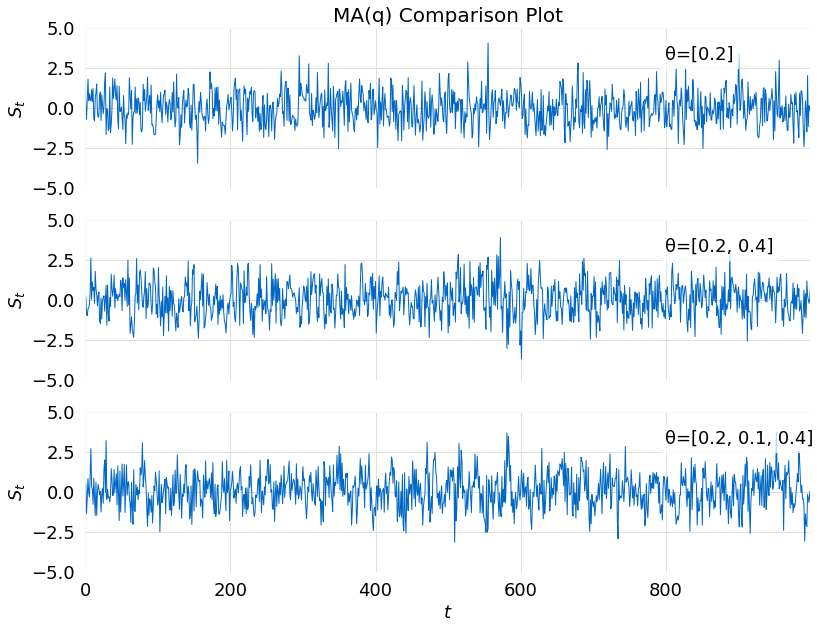

In [3]:
stack(ma, ylim=[-5.0, 5.0], title=title, labels=labels)

## Estimation of $\text{MA}(q)$ Parameters

$\text{MA}(q)$ parameters are estimated using `statsmodels.tsa.arima_model.ARMA`

### $\text{MA}(1)$ Example ($\varphi = 0.2$)

In [4]:
results = perform_est(ma[0], EstType.MA, order=1)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   S(t)   No. Observations:                 1000
Model:                 ARIMA(0, 0, 1)   Log Likelihood               -1419.634
Date:                Mon, 30 May 2022   AIC                           2845.268
Time:                        10:35:30   BIC                           2859.992
Sample:                             0   HQIC                          2850.864
                               - 1000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0055      0.037      0.149      0.881      -0.067       0.078
ma.L1          0.1683      0.030      5.544      0.000       0.109       0.228
sigma2         1.0014      0.045     22.423      0.000       0.914       1.089
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 2.19
Prob(Q):                              0.92   Prob(JB):                         0.33
Heteroskedasticity (H):               1.03   Skew:                             0.11
Prob(H) (two-sided):                  0.80   Kurtosis:                         3.03
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [5]:
ma[0].attrs

{'S(t)': {'npts': 1000,
  'DataType': <DataType.TIME_SERIES: 'TIME_SERIES'>,
  'Parameters': {'θ': [0.2], 'σ': 1.0},
  'Description': 'MA(1)',
  'ylabel': '$S_t$',
  'xlabel': '$t$',
  'SourceSchema': None,
  'Formula': None,
  'Estimates': {'MA(1)': {'Type': <EstType.MA: 'MA'>,
    'Const': {'Estimate': 0.0055436776039690895,
     'Error': 0.037095802530328535,
     'Estimate Label': '$\\hat{\\mu^*}$',
     'Error Label': '$\\sigma_{\\hat{\\mu^*}}$'},
    'Parameters': [{'Estimate': 0.1682565928720849,
      'Error': 0.03034810372444071,
      'Estimate Label': '$\\hat{\\theta_{0}}$',
      'Error Label': '$\\sigma_{$\\hat{\theta_{0}}}$'}],
    'Sigma2': {'Estimate': 1.001353794367477,
     'Error': 0.04465764032474223,
     'Estimate Label': '$\\hat{\\sigma^2}$',
     'Error Label': '$\\sigma_{\\hat{\\sigma^2}}$'}}},
  'Tests': {}},
 'Date': '30/05/2022 10:35:30',
 'Name': 'MA(1)-Simulation-57d8f72f-4158-43c8-9d2e-3828816da261',
 'SourceSchema': None,
 'Schema': DataSchema(xcol=(Time

### $\text{MA}(2)$ Example ($\varphi = [0.2, 0.4]$)

In [6]:
results = perform_est(ma[1], EstType.MA, order=2)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   S(t)   No. Observations:                 1000
Model:                 ARIMA(0, 0, 2)   Log Likelihood               -1408.482
Date:                Mon, 30 May 2022   AIC                           2824.963
Time:                        10:35:30   BIC                           2844.594
Sample:                             0   HQIC                          2832.425
                               - 1000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0495      0.050      0.983      0.325      -0.049       0.148
ma.L1          0.2027      0.030      6.779      0.000       0.144       0.261
ma.L2          0.4025      0.030     13.559      0.000       0.344       0.461
sigma2         0.9789      0.045     21.993      0.000       0.892       1.066
===================================================================================
Ljung-Box (L1) (Q):                   0.47   Jarque-Bera (JB):                 1.78
Prob(Q):                              0.49   Prob(JB):                         0.41
Heteroskedasticity (H):               0.96   Skew:                             0.10
Prob(H) (two-sided):                  0.73   Kurtosis:                         2.95
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [7]:
ma[1].attrs

{'S(t)': {'npts': 1000,
  'DataType': <DataType.TIME_SERIES: 'TIME_SERIES'>,
  'Parameters': {'θ': [0.2, 0.4], 'σ': 1.0},
  'Description': 'MA(2)',
  'ylabel': '$S_t$',
  'xlabel': '$t$',
  'SourceSchema': None,
  'Formula': None,
  'Estimates': {'MA(2)': {'Type': <EstType.MA: 'MA'>,
    'Const': {'Estimate': 0.04954561822971516,
     'Error': 0.05037691378356989,
     'Estimate Label': '$\\hat{\\mu^*}$',
     'Error Label': '$\\sigma_{\\hat{\\mu^*}}$'},
    'Parameters': [{'Estimate': 0.2027224154224504,
      'Error': 0.0299054826014032,
      'Estimate Label': '$\\hat{\\theta_{0}}$',
      'Error Label': '$\\sigma_{$\\hat{\theta_{0}}}$'},
     {'Estimate': 0.4025041217342523,
      'Error': 0.029684912576888718,
      'Estimate Label': '$\\hat{\\theta_{1}}$',
      'Error Label': '$\\sigma_{$\\hat{\theta_{1}}}$'}],
    'Sigma2': {'Estimate': 0.9789268334008925,
     'Error': 0.044511845645509106,
     'Estimate Label': '$\\hat{\\sigma^2}$',
     'Error Label': '$\\sigma_{\\hat{\\sig

### $\text{MA}(3)$ Example ($\varphi = [0.2, 0.1, 0.4]$)

In [8]:
results = perform_est(ma[2], EstType.MA, order=3)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   S(t)   No. Observations:                 1000
Model:                 ARIMA(0, 0, 3)   Log Likelihood               -1391.857
Date:                Mon, 30 May 2022   AIC                           2793.715
Time:                        10:35:30   BIC                           2818.253
Sample:                             0   HQIC                          2803.041
                               - 1000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0940      0.055      1.711      0.087      -0.014       0.202
ma.L1          0.1900      0.028      6.785      0.000       0.135       0.245
ma.L2          0.1210      0.029      4.138      0.000       0.064       0.178
ma.L3          0.4582      0.029     15.583      0.000       0.401       0.516
sigma2         0.9466      0.044     21.607      0.000       0.861       1.032
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                 2.55
Prob(Q):                              0.87   Prob(JB):                         0.28
Heteroskedasticity (H):               1.13   Skew:                            -0.11
Prob(H) (two-sided):                  0.25   Kurtosis:                         2.91
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [9]:
ma[2].attrs

{'S(t)': {'npts': 1000,
  'DataType': <DataType.TIME_SERIES: 'TIME_SERIES'>,
  'Parameters': {'θ': [0.2, 0.1, 0.4], 'σ': 1.0},
  'Description': 'MA(3)',
  'ylabel': '$S_t$',
  'xlabel': '$t$',
  'SourceSchema': None,
  'Formula': None,
  'Estimates': {'MA(3)': {'Type': <EstType.MA: 'MA'>,
    'Const': {'Estimate': 0.09402517635912715,
     'Error': 0.054965552802929016,
     'Estimate Label': '$\\hat{\\mu^*}$',
     'Error Label': '$\\sigma_{\\hat{\\mu^*}}$'},
    'Parameters': [{'Estimate': 0.19003261561962942,
      'Error': 0.028006166255323418,
      'Estimate Label': '$\\hat{\\theta_{0}}$',
      'Error Label': '$\\sigma_{$\\hat{\theta_{0}}}$'},
     {'Estimate': 0.12104026675311952,
      'Error': 0.029249196398438947,
      'Estimate Label': '$\\hat{\\theta_{1}}$',
      'Error Label': '$\\sigma_{$\\hat{\theta_{1}}}$'},
     {'Estimate': 0.45819936256870497,
      'Error': 0.029403204325637124,
      'Estimate Label': '$\\hat{\\theta_{2}}$',
      'Error Label': '$\\sigma_{$\\ha

## Simulations ($\sigma = 5$)

In [10]:
nsample = 1000
σ = 5.0
θ_vals = [[0.2], [0.2, 0.4], [0.2, 0.1, 0.4]]
params = [{"θ": θ, "σ": σ, "npts": nsample} for θ in θ_vals]
title = "MA(q) Comparison Plot"
labels = [f"θ={val}" for val in θ_vals] 
ma = DataSource.create_parameter_scan(SourceType.MA, *params)

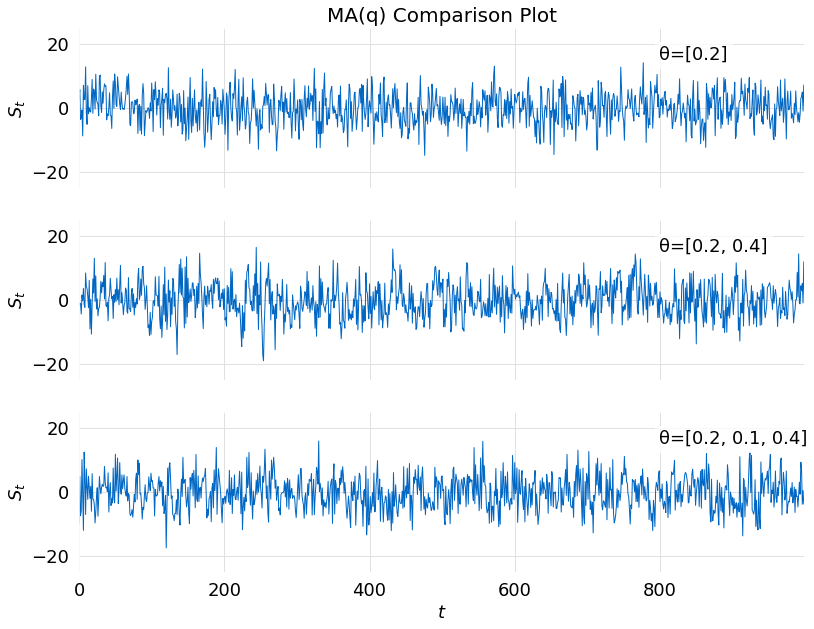

In [11]:
stack(ma, ylim=[-25.0, 25.0], title=title, labels=labels)

## Estimation of $\text{MA}(q)$ Parameters

$\text{MA}(q)$ parameters are estimated using `statsmodels.tsa.arima_model.ARMA`

### $\text{MA}(1)$ Example ($\varphi = 0.2$)

In [12]:
results = perform_est(ma[0], EstType.MA, order=1)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   S(t)   No. Observations:                 1000
Model:                 ARIMA(0, 0, 1)   Log Likelihood               -3006.190
Date:                Mon, 30 May 2022   AIC                           6018.380
Time:                        10:35:31   BIC                           6033.104
Sample:                             0   HQIC                          6023.976
                               - 1000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0058      0.184      0.032      0.975      -0.354       0.366
ma.L1          0.1849      0.031      5.918      0.000       0.124       0.246
sigma2        23.9140      1.099     21.759      0.000      21.760      26.068
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):                 2.30
Prob(Q):                              0.82   Prob(JB):                         0.32
Heteroskedasticity (H):               0.85   Skew:                            -0.11
Prob(H) (two-sided):                  0.13   Kurtosis:                         2.91
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [13]:
ma[0].attrs

{'S(t)': {'npts': 1000,
  'DataType': <DataType.TIME_SERIES: 'TIME_SERIES'>,
  'Parameters': {'θ': [0.2], 'σ': 5.0},
  'Description': 'MA(1)',
  'ylabel': '$S_t$',
  'xlabel': '$t$',
  'SourceSchema': None,
  'Formula': None,
  'Estimates': {'MA(1)': {'Type': <EstType.MA: 'MA'>,
    'Const': {'Estimate': 0.005790528302958405,
     'Error': 0.18382171935228692,
     'Estimate Label': '$\\hat{\\mu^*}$',
     'Error Label': '$\\sigma_{\\hat{\\mu^*}}$'},
    'Parameters': [{'Estimate': 0.18490266526309287,
      'Error': 0.03124235963071989,
      'Estimate Label': '$\\hat{\\theta_{0}}$',
      'Error Label': '$\\sigma_{$\\hat{\theta_{0}}}$'}],
    'Sigma2': {'Estimate': 23.91402744253201,
     'Error': 1.0990575107787661,
     'Estimate Label': '$\\hat{\\sigma^2}$',
     'Error Label': '$\\sigma_{\\hat{\\sigma^2}}$'}}},
  'Tests': {}},
 'Date': '30/05/2022 10:35:30',
 'Name': 'MA(1)-Simulation-f724416a-ddf2-4def-8a05-a0747de4b4ca',
 'SourceSchema': None,
 'Schema': DataSchema(xcol=(Time),

### $\text{MA}(2)$ Example ($\varphi = [0.2, 0.4]$)

In [14]:
results = perform_est(ma[1], EstType.MA, order=2)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   S(t)   No. Observations:                 1000
Model:                 ARIMA(0, 0, 2)   Log Likelihood               -2999.459
Date:                Mon, 30 May 2022   AIC                           6006.918
Time:                        10:35:31   BIC                           6026.549
Sample:                             0   HQIC                          6014.379
                               - 1000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1075      0.251     -0.429      0.668      -0.599       0.384
ma.L1          0.1979      0.028      6.970      0.000       0.142       0.254
ma.L2          0.4259      0.029     14.795      0.000       0.369       0.482
sigma2        23.5846      1.107     21.305      0.000      21.415      25.754
===================================================================================
Ljung-Box (L1) (Q):                   0.18   Jarque-Bera (JB):                 3.97
Prob(Q):                              0.67   Prob(JB):                         0.14
Heteroskedasticity (H):               0.92   Skew:                             0.13
Prob(H) (two-sided):                  0.44   Kurtosis:                         2.83
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [15]:
ma[1].attrs

{'S(t)': {'npts': 1000,
  'DataType': <DataType.TIME_SERIES: 'TIME_SERIES'>,
  'Parameters': {'θ': [0.2, 0.4], 'σ': 5.0},
  'Description': 'MA(2)',
  'ylabel': '$S_t$',
  'xlabel': '$t$',
  'SourceSchema': None,
  'Formula': None,
  'Estimates': {'MA(2)': {'Type': <EstType.MA: 'MA'>,
    'Const': {'Estimate': -0.10753774732243572,
     'Error': 0.2507184610233053,
     'Estimate Label': '$\\hat{\\mu^*}$',
     'Error Label': '$\\sigma_{\\hat{\\mu^*}}$'},
    'Parameters': [{'Estimate': 0.1978683900602214,
      'Error': 0.02839027731494476,
      'Estimate Label': '$\\hat{\\theta_{0}}$',
      'Error Label': '$\\sigma_{$\\hat{\theta_{0}}}$'},
     {'Estimate': 0.42586170325898676,
      'Error': 0.02878406882341909,
      'Estimate Label': '$\\hat{\\theta_{1}}$',
      'Error Label': '$\\sigma_{$\\hat{\theta_{1}}}$'}],
    'Sigma2': {'Estimate': 23.58462698357002,
     'Error': 1.1070113066541865,
     'Estimate Label': '$\\hat{\\sigma^2}$',
     'Error Label': '$\\sigma_{\\hat{\\sigma

### $\text{MA}(3)$ Example ($\varphi = [0.2, 0.1, 0.4]$)

In [16]:
results = perform_est(ma[2], EstType.MA, order=3)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   S(t)   No. Observations:                 1000
Model:                 ARIMA(0, 0, 3)   Log Likelihood               -2983.505
Date:                Mon, 30 May 2022   AIC                           5977.011
Time:                        10:35:31   BIC                           6001.550
Sample:                             0   HQIC                          5986.337
                               - 1000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2873      0.255     -1.126      0.260      -0.788       0.213
ma.L1          0.1570      0.030      5.297      0.000       0.099       0.215
ma.L2          0.1308      0.029      4.524      0.000       0.074       0.188
ma.L3          0.4002      0.029     13.815      0.000       0.343       0.457
sigma2        22.8417      1.090     20.958      0.000      20.706      24.978
===================================================================================
Ljung-Box (L1) (Q):                   0.21   Jarque-Bera (JB):                 2.48
Prob(Q):                              0.65   Prob(JB):                         0.29
Heteroskedasticity (H):               1.15   Skew:                             0.02
Prob(H) (two-sided):                  0.19   Kurtosis:                         2.76
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [17]:
ma[2].attrs

{'S(t)': {'npts': 1000,
  'DataType': <DataType.TIME_SERIES: 'TIME_SERIES'>,
  'Parameters': {'θ': [0.2, 0.1, 0.4], 'σ': 5.0},
  'Description': 'MA(3)',
  'ylabel': '$S_t$',
  'xlabel': '$t$',
  'SourceSchema': None,
  'Formula': None,
  'Estimates': {'MA(3)': {'Type': <EstType.MA: 'MA'>,
    'Const': {'Estimate': -0.28732470956667566,
     'Error': 0.2552510602918204,
     'Estimate Label': '$\\hat{\\mu^*}$',
     'Error Label': '$\\sigma_{\\hat{\\mu^*}}$'},
    'Parameters': [{'Estimate': 0.15702170563842194,
      'Error': 0.029645031146799946,
      'Estimate Label': '$\\hat{\\theta_{0}}$',
      'Error Label': '$\\sigma_{$\\hat{\theta_{0}}}$'},
     {'Estimate': 0.13084133711391785,
      'Error': 0.028923611946879677,
      'Estimate Label': '$\\hat{\\theta_{1}}$',
      'Error Label': '$\\sigma_{$\\hat{\theta_{1}}}$'},
     {'Estimate': 0.4002185395425735,
      'Error': 0.02896945207291326,
      'Estimate Label': '$\\hat{\\theta_{2}}$',
      'Error Label': '$\\sigma_{$\\hat{\